In [195]:
using Plots
using LinearAlgebra
#import Pkg; Pkg.add("ArraysOfArrays")
using ArraysOfArrays
using BenchmarkTools

In [136]:
include("../aux_functions/aux_functions_Interpolate.jl")
include("../aux_functions/aux_functions_shapes.jl")
include("../aux_functions/aux_functions_grid.jl")


get_index_and_y_alt! (generic function with 1 method)

## 1D

In [206]:
J = (4000,)
Box = (0.0, 1.0)
dx = differentials(Box,J)

xv = [(i-1)*dx[1] for i in 1:J[1]]

m=3
vector = sin.(2π*m*xv)
#vector = ones(J)



order = 5

x = 0.3111

f1(x) = Interpolate_1(order, vector, x, J[1], Box[2]) 
f2(x) = Interpolate_2(order, vector, x, J[1], Box[2]) 
f_per(x) = Interpolate_per(order, vector, x, J[1],Box[2]) 
f1_D(x) = Interpolate_1(order, vector, x, J, Box)

fe(x) = sin(2π*m*x)

fe (generic function with 2 methods)

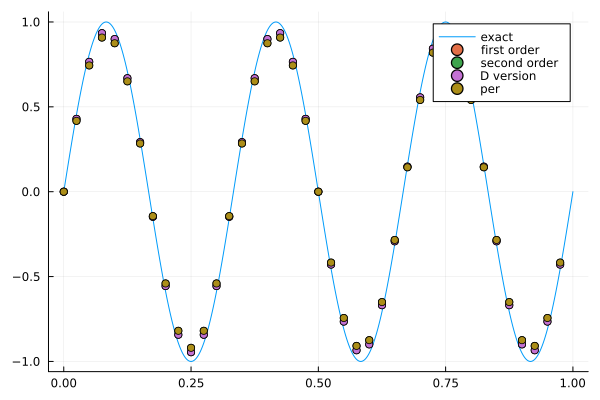

In [138]:
xp = 0.0:0.001:1.0
#plot(xp,f1.(xp))
plot(xp,sin.(2π*m*xp), label="exact")
scatter!(xv,f1.(xv), label="first order")
scatter!(xv,f2.(xv), label="second order")
scatter!(xv,f1_D.(xv), label="D version")
scatter!(xv,f_per.(xv), label="per")

In [ ]:
plot(xp,f1.(xp) - sin.(2π*m*xp))

plot(f)

In [143]:
norm(f2.(xp) - f_per.(xp))

2.6772534538316e-15

### Timing 1D

In [207]:
 
@btime  f1.($xp)
@btime  f_per.($xp)
@btime  f2.($xp)
@btime  f1_D.($xp)

  736.703 μs (4503 allocations: 78.61 KiB)


  806.345 μs (4503 allocations: 78.61 KiB)


  785.051 μs (4503 allocations: 78.61 KiB)


  211.690 μs (2501 allocations: 47.33 KiB)


1001-element Vector{Float64}:
  1.1034467610471221e-16
  0.018848335075692262
  0.0376899734276807
  0.05651822071157554
  0.07532638734076973
  0.09410779086321723
  0.11285575833567639
  0.1315636286945749
  0.15022475512265396
  0.16883250741055086
  ⋮
 -0.15022475512265515
 -0.1315636286945753
 -0.11285575833567715
 -0.09410779086321841
 -0.0753263873407701
 -0.05651822071157628
 -0.037689973427681836
 -0.018848335075692592
  1.1034467610471221e-16

#### Results J=4000, length(xp) = 1000

  736.703 μs (4503 allocations: 78.61 KiB) Primer orden
  
  806.345 μs (4503 allocations: 78.61 KiB) Segundo orden sin mod1 No usar mod1 no parece hacer mucho en este caso.
  
  785.051 μs (4503 allocations: 78.61 KiB) Segundo orden con mod1
  
  211.690 μs (2501 allocations: 47.33 KiB) Multi-dim en D=1 No entiendo porqué este anda mucho mejor.

In [209]:
x = 0.311111
@btime  Interpolate_1($order, $vector, $x, $J[1], $Box[2])
@btime  Interpolate_per($order, $vector, $x, $J[1], $Box[2])
@btime  Interpolate_2($order, $vector, $x, $J[1], $Box[2])
@btime  Interpolate_1($order, $vector, $x, $J, $Box)

  141.776 ns (0 allocations: 0 bytes)


  207.664 ns (0 allocations: 0 bytes)


  186.611 ns (0 allocations: 0 bytes)


  147.592 ns (0 allocations: 0 bytes)


-0.40673629833477604

#### Results J=4000 un único valor para x

  141.776 ns (0 allocations: 0 bytes)
  207.664 ns (0 allocations: 0 bytes)
  186.611 ns (0 allocations: 0 bytes)
  147.592 ns (0 allocations: 0 bytes)

  Aquí todos andan similarmente y no alocan nada. Sin mod1 es el más lento.

### 2D

In [176]:
include("../aux_functions/aux_functions_Interpolate.jl")
#J = (40,4000) # this reproduces well the 1D
#k = 2π*[3,1]
#J = (4000,160) # this case also
#k = 2π*[1,3]

J = (100,400)
k = 2π*[3,3]

Box = (0.0, 1.0, -1.0, 3.0)
dx = differentials(Box,J)

xv = [(i-1)*dx[1] for i in 1:J[1]]
yv = [(i-1)*dx[2] for i in 1:J[2]]

vector = sin.(k[1]*xv)*sin.(k[2]*yv)'
#vector = ones(J)



order = 5

x = [0.3111,0.30]

f1_D(x) = Interpolate_1(order, vector, x, J, Box)

fe(x,y) = sin(k[1]*x)*sin(k[2]*y)

#vector

fe (generic function with 2 methods)

In [167]:
f1_D(x) - fe(x[1],x[2])

-0.004212926978877235

In [ ]:
#surface(yv,xv,fe)

ff1_D(x,y) = f1_D([x,y])

diff(x,y) = fe(x,y) - f1_D([x,y])

surface(yv,xv,diff)



### For matrices of vectors (like E).

In [191]:
E = [(-1)^l*fe(xv[i],yv[j]) for l in 1:2, i in 1:J[1], j in 1:J[2]];

En = nestedview(E,1)

E_D(x) = Interpolate_1(order, En, x, J, Box)

E_D (generic function with 2 methods)

In [192]:
x = [0.3111,0.30]
E_D(x)

2-element Vector{Float64}:
 -0.23497333057328912
  0.23497333057328912

In [193]:
E_Df(x,y) = E_D([x,y])[1]

E_Df(0.2,0.3)

-0.3394061595754549

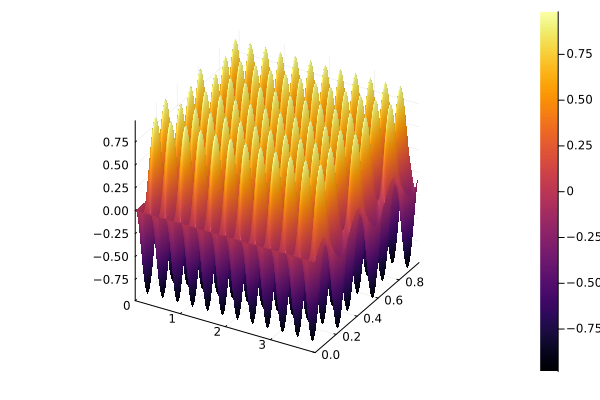

In [194]:

surface(yv,xv,E_Df)